(380, 511)
21


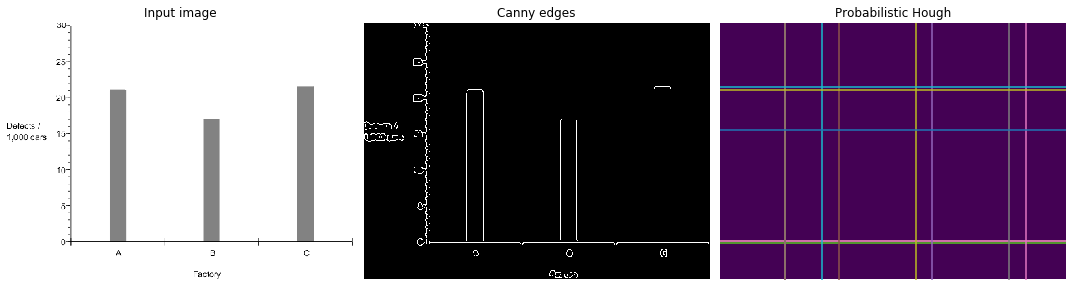

In [122]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform

from PIL import Image
img = Image.open('barChart.png').convert('L')
image = np.asarray(img)
print(image.shape)

# image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=40, line_length=10,
                                 line_gap=0)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
print(len(lines))
vertLines = []
horLines = []
for line in lines:
    p0, p1 = line
    newp0 = []
    newp1 = []
    if p0[1] == p1[1]:
        newp0.append(0)
        newp1.append(image.shape[1])
        newp0.append(p0[1])
        newp1.append(p1[1])
        ax[2].plot((newp0[0], newp1[0]), (newp0[1], newp1[1]))
        horLines.append(line)
    elif p0[0] == p1[0]:
        newp0.append(p0[0])
        newp1.append(p1[0])
        newp0.append(0)
        newp1.append(image.shape[0])
        ax[2].plot((newp0[0], newp1[0]), (newp0[1], newp1[1]))
        vertLines.append(line)
    else:
        pass
    
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [119]:
minX = image.shape[1]
verI = 0
yAx = ()
xAx = ()
for i in range(0, len(vertLines)):
    if minX > vertLines[i][0][0]:
        minX = vertLines[i][0][0]
        yAx = vertLines[i]
for i in range(0, len(horLines)):
    if minX > horLines[i][0][1]:
        minX = horLines[i][0][1]
        xAx = horLines[i]
        
barV = [i for i in vertLines if i[0][0] > yAx[0][0]]
barH = [i for i in vertLines if i[0][1] < xAx[0][1]]


def myFunc(e):
  return e[0][1]

def myFunc2(e):
  return e[0][1]

barH.sort(key=myFunc)
barV.sort(key=myFunc2)

[((453, 321), (453, 99)), ((176, 321), (176, 103)), ((428, 321), (428, 98)), ((151, 321), (151, 105)), ((314, 321), (314, 145)), ((290, 321), (290, 145))]


In [97]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
print(pytesseract.image_to_string('barChart.png'))

25

20:

Defects /

1,000cars 15
10
5
0

A B

Factory



In [90]:
labels = pytesseract.image_to_string(r'barChart.png')
labList = labels.split("\n")
newL = [i for i in labList if i]
nums = []
lasNum = 0
for i in range(0, len(newL)):
    try:
        number = int(newL[i])
        nums.append(number)
        lasNum = i
    except:
        pass
catLab = newL[lasNum+1].split()
print(catLab)
print(nums)

['A', 'B']
[25, 10, 5, 0]
